___

# Linear Regression Example 
## Predicting customers' yearly amount spent at an e-commerce company

#### Read the business case below and develop a linear regression model to help inform strategic advice you will need to provide to your client.

##### Summary:
An ecommerce company that sells clothing online, also has an in-store style and clothing advice service. Customers come in to the store, have sessions with a personal stylist. They can then go home and order clothing either on a mobile app or website.

##### Challenge:
The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Your role as data scientist on this project is to help them determine the best strategic approach using your machine learning knowledge.

Follow the steps below to analyze the customer data 

**(Not to worry; All the data provided is fabricated, but in a real-life situation the data you would be dealing with here is considered to fall under the designation of PII. Keep this in mind when working on projects out in the real world)**

---

## Imports
** Import pandas, numpy, matplotlib.pyplot,and seaborn. Then set '%matplotlib inline' so you can see your plots displayed without explicitly having to type show() 
(you can import Sklearn here or later when you start developing your regression model)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv('../../data/Ecommerce Customers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

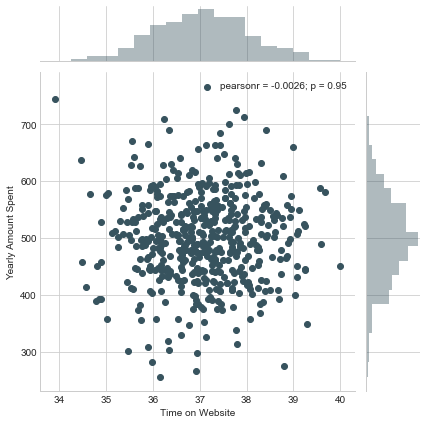

In [8]:
# More time on site, more money spent.

sns.jointplot(x='Time on Website', y = "Yearly Amount Spent", data=customers)

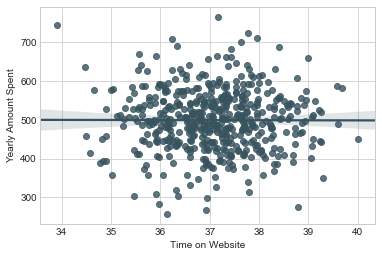

In [9]:
sns.regplot(x='Time on Website', y = "Yearly Amount Spent", data=customers)

#### Do the same but with the Time on App column instead.

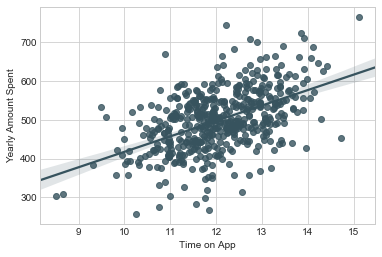

In [11]:
sns.regplot(x='Time on App', y = "Yearly Amount Spent", data=customers);

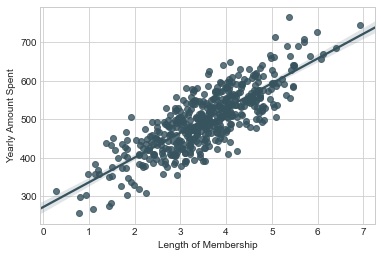

In [13]:
sns.regplot(x='Length of Membership', y = "Yearly Amount Spent", data=customers);

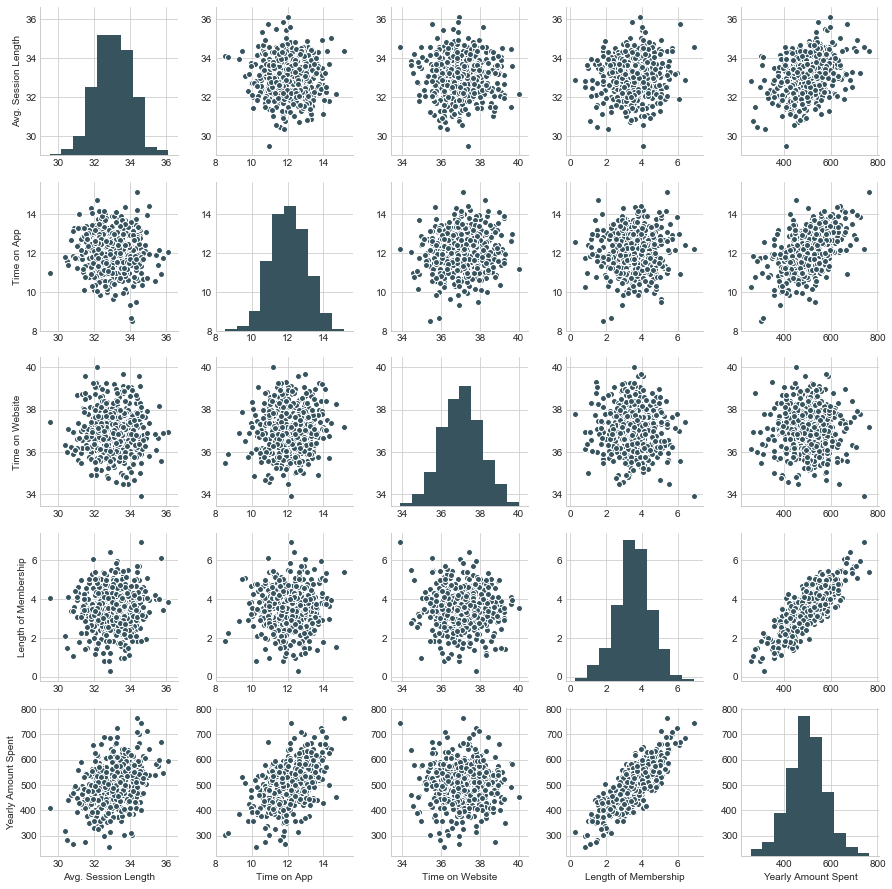

In [14]:
sns.pairplot(customers)

#### Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
# Length of Membership 

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. BONUS - What's the equation of the line? **

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [15]:
y = customers['Yearly Amount Spent']

In [22]:
X = customers[['Time on App', 'Avg. Session Length', 'Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [25]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [26]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [27]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [28]:
# The coefficients
print('Independent Variables:', list(X.columns), '\n')
print('Coefficients:', list(lm.coef_))

Independent Variables: ['Time on App', 'Avg. Session Length', 'Time on Website', 'Length of Membership'] 

Coefficients: [38.68815595942115, 25.690831758811246, 0.4527990768376166, 61.710502594620344]


In [29]:
list(zip(list(X.columns), list(lm.coef_)))

[('Time on App', 38.68815595942115),
 ('Avg. Session Length', 25.690831758811246),
 ('Time on Website', 0.4527990768376166),
 ('Length of Membership', 61.710502594620344)]

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [30]:
predictions = lm.predict(X_test)

In [31]:
predictions

array([403.36087526, 542.49652255, 426.79061944, 501.98000522,
       409.90016607, 569.95203575, 531.68712688, 506.10842617,
       408.47031037, 473.71493101, 441.30201774, 425.05268133,
       424.93655583, 527.27340348, 431.24084639, 423.76635768,
       575.73837263, 484.73375076, 458.15131382, 481.73089746,
       502.04156769, 513.39008852, 507.55579577, 646.54871994,
       449.98886069, 496.07689142, 556.2403381 , 554.77842999,
       399.41536028, 325.54121912, 532.65563818, 477.96272707,
       500.87585571, 305.69578623, 505.5581936 , 483.59198597,
       518.72294437, 437.96539568, 456.5172541 , 470.84325957,
       494.20975196, 445.1840947 , 508.62394573, 500.91793768,
       488.73418105, 535.19202701, 595.04122136, 513.81284729,
       280.44329112, 433.04560196, 421.42401729, 481.13163584,
       584.63530063, 608.71467973, 564.01947373, 494.49273084,
       394.32484472, 456.44102533, 572.84643521, 499.46263062,
       512.73482583, 391.89419968, 479.80345348, 481.34

** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'The predicted values')

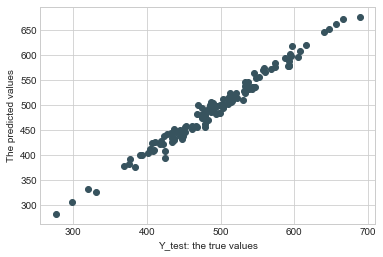

In [32]:
plt.scatter(y_test, predictions)
plt.xlabel('Y_test: the true values')
plt.ylabel('The predicted values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

<a id="evaluation-metrics-for-regression-problems"></a>
<a id="evaluation-metrics-for-regression-problems"></a>
### Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [33]:
# calculate these metrics NOT by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.460454170141164
MSE: 105.64514296279494
RMSE: 10.27838231254291


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

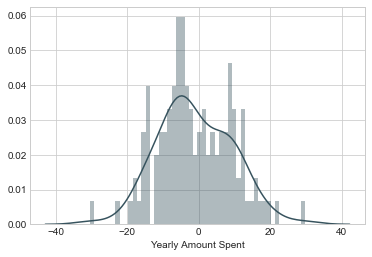

In [34]:
sns.distplot((y_test-predictions), bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [35]:
lm.coef_

array([38.68815596, 25.69083176,  0.45279908, 61.71050259])

In [36]:
X.columns

Index(['Time on App', 'Avg. Session Length', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [37]:
coeffs = pd.DataFrame(lm.coef_, X.columns)
coeffs.columns = ['Coefficient']
coeffs

,Coefficient
Time on App,38.688156
Avg. Session Length,25.690832
Time on Website,0.452799
Length of Membership,61.710503


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!